### Importing libraries and loading data

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
#import wordcloud
#from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
#from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from scipy.stats import pearsonr

c:\Users\gugah\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.neighbors import KNeighborsClassifier

### Loading data set

In [6]:
df=pd.read_csv(r"C:\Users\gugah\Desktop\Titanic-master\train.csv")

### Exploring Data

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Let's see how many people survived and what is the percentage**

<AxesSubplot:xlabel='Survived', ylabel='count'>

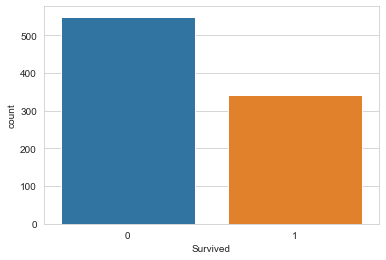

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df)

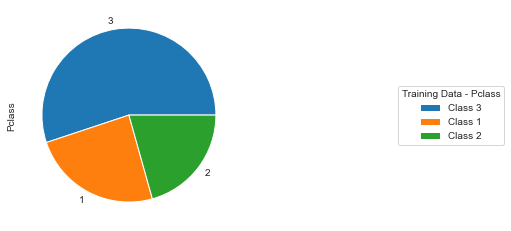

In [11]:
df.Pclass.value_counts().plot.pie().legend(labels=["Class 3","Class 1","Class 2"], loc='center right', bbox_to_anchor=(2.25, 0.5)).set_title("Training Data - Pclass")

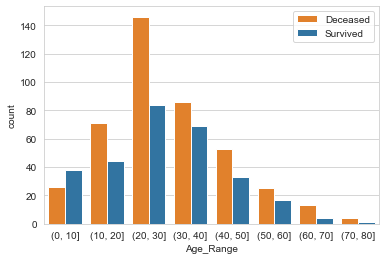

In [12]:
df['Age_Range'] = pd.cut(df.Age, [0, 10, 20, 30, 40, 50, 60,70,80])
sns.countplot(x = "Age_Range", hue = "Survived", data = df, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])

c:\Users\gugah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

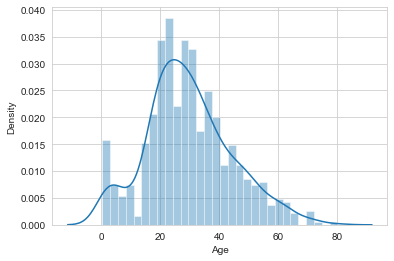

In [15]:
sns.distplot(df['Age'].dropna(),bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

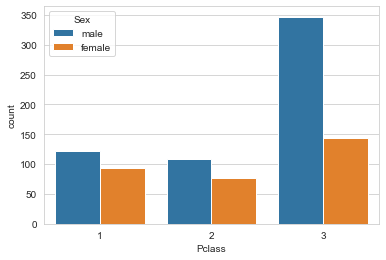

In [16]:
sns.countplot(x='Pclass', hue='Sex', data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

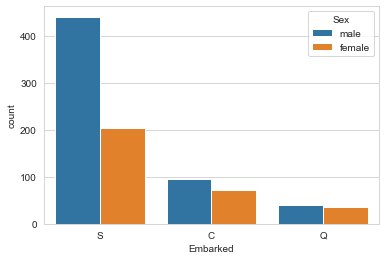

In [17]:
sns.countplot(x='Embarked', hue='Sex', data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

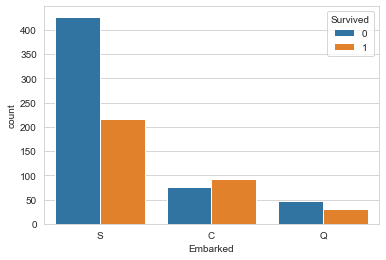

In [18]:
sns.countplot(x='Embarked', hue='Survived', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

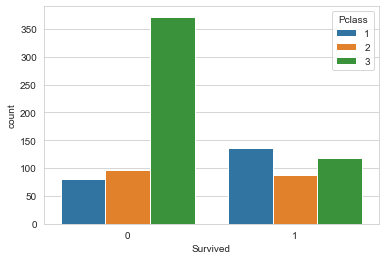

In [19]:
sns.countplot(x='Survived', hue='Pclass', data=df)

In [20]:
survived=sum(df['Survived']==1)
total=len(df['Survived'])
survived_percentage= survived / total
print ('Number of survived people is: ', survived)
print('\n')
print ('Survived Percentage is: ',survived_percentage )

Number of survived people is:  342


Survived Percentage is:  0.3838383838383838


As we see, just 38% of people survived from this disaster

**Let's look at survived - sex relation**

<AxesSubplot:xlabel='Survived', ylabel='count'>

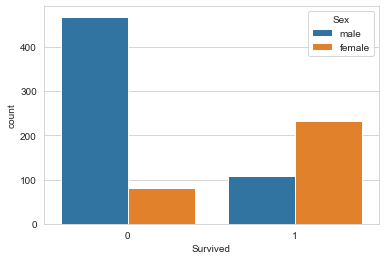

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df)

Most of the males are doomed and survived females look like twice of the males.

**Let's see survived - class relation**

<AxesSubplot:xlabel='Survived', ylabel='count'>

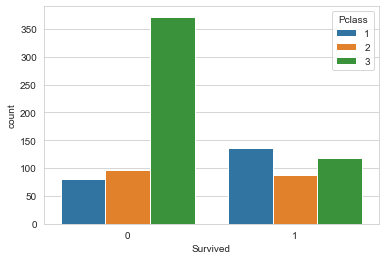

In [22]:
sns.countplot(x='Survived', hue='Pclass', data=df)

The most survivals are in first class.

### Handling with missing values

In [23]:
print (df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_Range      177
dtype: int64


There are null values on Age, Cabin and Embarked columns. We have to take care of these values before applying kNN algorithm

We will fill missing values with mean of age per class. First we will calculate mean of age for each class and then fill the null values with these means.

In [24]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)

In [25]:
lst1=[]
lst2=[]
lst3=[]
n=len(df.Survived)
i=0
while i< n:
    if df['Pclass'][i]==1 and pd.isnull(df['Age'][i]) == False:
        lst1.append(df['Age'][i])
    elif df['Pclass'][i]==2  and pd.isnull(df['Age'][i]) == False:
        lst2.append(df['Age'][i])
    elif df['Pclass'][i]==3 and pd.isnull(df['Age'][i]) == False :
        lst3.append(df['Age'][i])
    i+=1

Mean_Pclass_1 = sum(lst1)/len(lst1)
Mean_Pclass_2 = sum(lst2)/len(lst2)
Mean_Pclass_3 = sum(lst3)/len(lst3)


def impute (col):
    Age= col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return Mean_Pclass_1
        elif Pclass ==2:
            return Mean_Pclass_2
        else:
            return Mean_Pclass_3
    else:
        return Age

In [26]:
df.Age= df[['Age', 'Pclass']].apply(impute, axis=1)

Scatter Plots

In [34]:
df['family_size'] = df.SibSp + df.Parch

In [35]:
list1 = df['Age']
list2 = df['Fare']
list3 = df['family_size']

c:\Users\gugah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


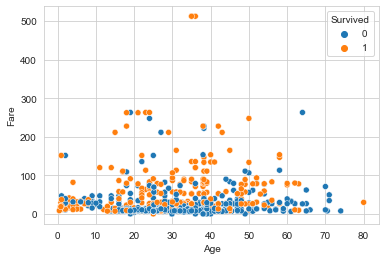

In [37]:
g =sns.scatterplot(list1, list2,
              hue="Survived",
              data=df);

c:\Users\gugah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


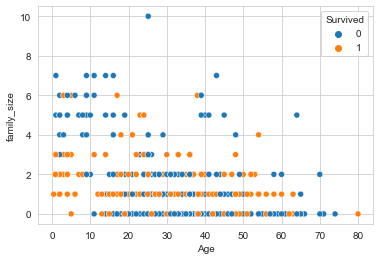

In [39]:
h =sns.scatterplot(list1, list3,
              hue="Survived",
              data=df);

c:\Users\gugah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


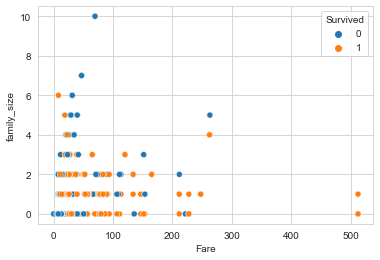

In [40]:
i =sns.scatterplot(list2, list3,
              hue="Survived",
              data=df);

In [27]:
df.groupby('Pclass').agg({'Age':['min', 'max', 'count', 'mean']})

Age                       
         min   max count       mean
Pclass                             
1       0.92  80.0   216  38.233441
2       0.67  70.0   184  29.877630
3       0.42  74.0   491  25.140620

It seems creating a family size feature is a good option

In [28]:
df['family_size'] = df.SibSp + df.Parch

c:\Users\gugah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='family_size', ylabel='Density'>

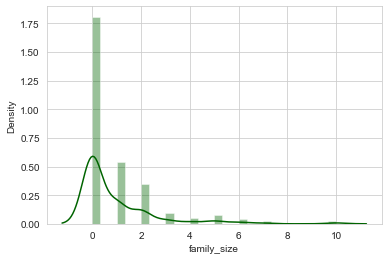

In [29]:
sns.distplot(df['family_size'],color='darkgreen',bins=30)

In [75]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


c:\Users\gugah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='family_size', ylabel='Density'>

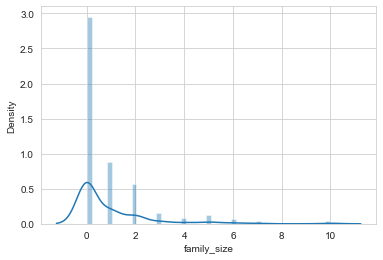

In [76]:
sns.distplot(df.family_size)

Since we do not use Cabin variable on this project we will drop it from data set

In [77]:
df.drop('Cabin', inplace=True, axis=1)

In [78]:
df.dropna(inplace=True)

c:\Users\gugah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


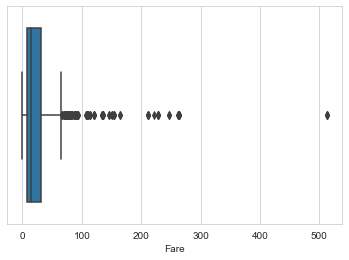

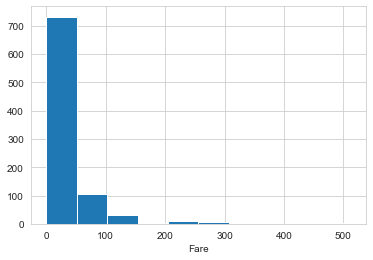

c:\Users\gugah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


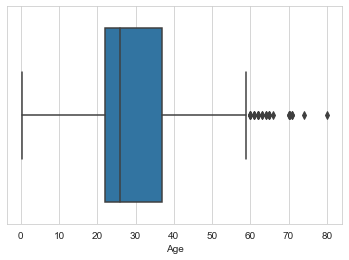

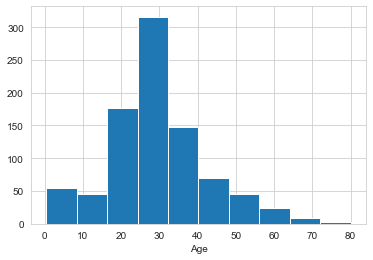

c:\Users\gugah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


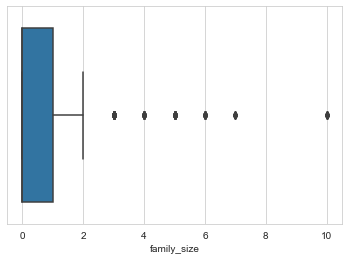

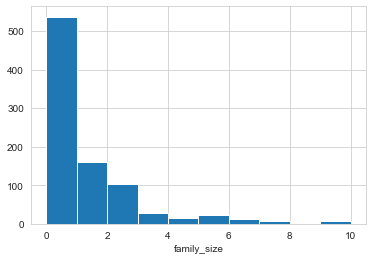

skewness value of Age:  0.509544674370829
skewness value of Fare:  4.787316519674893
skewness value of family_size:  2.7274414739308535


In [45]:
#Fare
sns.boxplot(df['Fare'])
plt.xlabel('Fare')
plt.show()

df['Fare'].hist()
plt.xlabel('Fare')
plt.show()

#Age
sns.boxplot(df['Age'])
plt.xlabel('Age')
plt.show()

df['Age'].hist()
plt.xlabel('Age')
plt.show()

#SibSp
sns.boxplot(df['family_size'])
plt.xlabel('family_size')
plt.show()

df['family_size'].hist()
plt.xlabel('family_size')
plt.show()




#Skewness values
print('skewness value of Age: ',df['Age'].skew())
print('skewness value of Fare: ',df['Fare'].skew())
print('skewness value of family_size: ',df['family_size'].skew())


Age_skew = df['Age'].skew()
Fare_skew = df['Fare'].skew()
family_size_skew = df['family_size'].skew()


So we do not have any issing values, we are good to go.

**Dummy Variables**

Since Sex and Embark columns are categorical features, we will use dummy variables instead of these ones.

In [79]:
sex=pd.get_dummies(df.Sex, drop_first=True)

In [80]:
embark=pd.get_dummies(df.Embarked, drop_first=True)

In [81]:
df=pd.concat([df,sex,embark], axis=1)

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,1


In [83]:
df.drop(['Name', 'PassengerId', 'Sex', 'Ticket', 'Embarked', 'SibSp'], axis=1, inplace=True)

In [84]:
df.head()

,Survived,Pclass,Age,Parch,Fare,family_size,male,Q,S
0,0,3,22.0,0,7.2500,1,1,0,1
1,1,1,38.0,0,71.2833,1,0,0,0
2,1,3,26.0,0,7.9250,0,0,0,1
3,1,1,35.0,0,53.1000,1,0,0,1
4,0,3,35.0,0,8.0500,0,1,0,1


#Analyzing correlation between features

In [85]:
df.corr()

,Survived,Pclass,Age,Parch,Fare,family_size,male,Q,S
Survived,1.000000,-0.338481,-0.050504,0.081629,0.257307,0.016639,-0.543351,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.403858,0.018443,-0.549500,0.065997,0.131900,0.221009,0.074053
Age,-0.050504,-0.403858,1.000000,-0.175799,0.120886,-0.254217,0.080464,-0.070315,0.007400
Parch,0.081629,0.018443,-0.175799,1.000000,0.216225,0.783111,-0.245489,-0.081228,0.060814
Fare,0.257307,-0.549500,0.120886,0.216225,1.000000,0.217138,-0.182333,-0.117216,-0.162184
family_size,0.016639,0.065997,-0.254217,0.783111,0.217138,1.000000,-0.200988,-0.058592,0.077359
male,-0.543351,0.131900,0.080464,-0.245489,-0.182333,-0.200988,1.000000,-0.074115,0.119224
Q,0.003650,0.221009,-0.070315,-0.081228,-0.117216,-0.058592,-0.074115,1.000000,-0.499421
S,-0.149683,0.074053,0.007400,0.060814,-0.162184,0.077359,0.119224,-0.499421,1.000000


<AxesSubplot:>

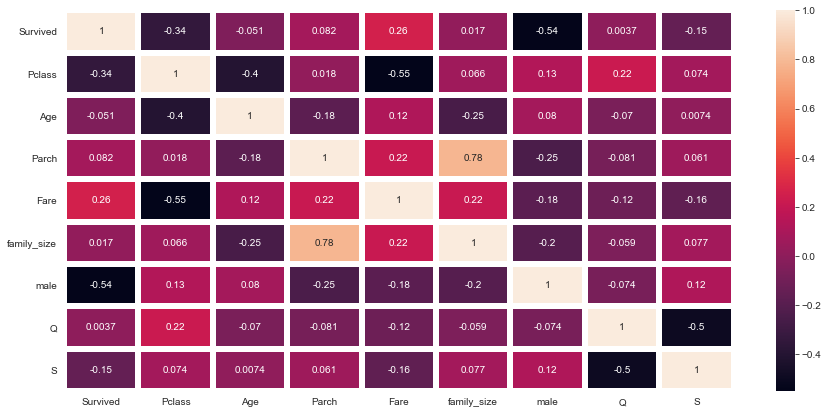

In [86]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),linewidths=5, annot=True)

We see that there is high necative correlation between Survived and males. As we saw before by plots male's survive rate was quite low, so it makes sense that males have negative correlation with survive

Besides, Pclass has negative correlation with survived. Because Pclass 3 is the lowest fare class, and this class was the crowded one, and survive rate was pretty low.

Also, Fare has negative correlation with Pclass, this is because Pclass 3 is the cheapest class.

Parch has high positive correlation with family_size. Because when we were creating family_size feature we have used Parch variable.



### kNN Algorithm

In [87]:
X=df.drop('Survived', axis=1)
y=df.Survived

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [90]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

Multiple values were tested for n_neighbors and for numbers lower and above '5', the accuracy of the test scored lower.

In [113]:
kNN=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
kNN.fit(X_train,y_train)

KNeighborsClassifier()

In [114]:
y_pred=kNN.predict(X_test)

In [115]:
knn_accy = round(accuracy_score(y_test, y_pred), 3)
print (knn_accy)
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.708
[[142  33]
 [ 53  67]]
0.67
0.5583333333333333
